# Análisis exploratorio de incidencia delictiva en México

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [67]:
df = pd.read_csv("/home/harold/ciencia_datos/proyecto_clase/limpieza_datos_y_eda/data/delitos.csv")

#### Ejercicio 1: Elige 3 estados de la república y grafica una serie de tiempo de la frecuencia abosluta de homicidios dolosos de enero 2015 a julio 2019 en estas tres entidades

(165, 7)
Estados: (165, 7)
Delito: (165, 7)
Fechas: (165, 7)


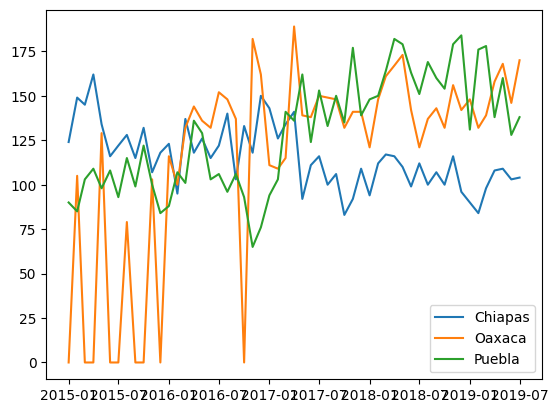

In [49]:
df = df[df["entidad"].isin(['Oaxaca', 'Puebla', 'Chiapas'])]

df = df[df["tipo_de_delito"] == "Homicidio"]

df["fecha"] = pd.to_datetime(df["fecha"])

df = df[(df["fecha"] >= "2015-01-01") & (df["fecha"] <= "2019-07-31")]

print(df.shape)
print("Estados:", df.shape)
print("Delito:", df.shape)
print("Fechas:", df.shape)

serie = df.groupby(["fecha","entidad"])["frecuencia"].sum().reset_index()

for estado in serie["entidad"].unique():
    data = serie[serie["entidad"] == estado]
    plt.plot(data["fecha"], data["frecuencia"], label=estado)
    
plt.legend()
plt.show()
          


In [60]:
df["tipo_de_delito"].unique()


<StringArray>
[                                                                       'Aborto',
                                                            'Abuso de confianza',
                                                                  'Abuso sexual',
                                                                  'Acoso sexual',
                                                        'Allanamiento de morada',
                                                                      'Amenazas',
                                                      'Contra el medio ambiente',
                                                         'Corrupción de menores',
                                                           'Daño a la propiedad',
                                     'Delitos cometidos por servidores públicos',
                                                                       'Despojo',
                                                                   'Electorales',
  

#### Ejercicio 2: Contetas las siguientes  preguntas:
1. ¿Cuántos homicidios dolosos hubo en Colima en el 2018?
2. ¿Cuantos robos de vehículo automotor ha habido en el 2019?
3. Obten la suma de homicidos dolosos y feminidios en toda la República Mexicana en cada año.
4. ¿En qué mes y en qué municipio ha ocurrido el mayor número de feminicidios?
5. ¿En qué año y en qué estado ha ocurrido el mayor número de feminicidios?

In [76]:
homicidios_colima = df[
    (df["tipo_de_delito"] == "Homicidio") &
    (df["entidad"] == "Colima") &
    (df["anio"] == 2018)
]["frecuencia"].sum()

print(f"Total de homicidios en Colima en 2018: {homicidios_colima}")

vehiculos = df[
    (df["tipo_de_delito"].str.contains("veh", case=False)) &
    (df["anio"] == 2019)
    ]["frecuencia"].sum()
print(f"Total de robos de vehículo: {vehiculos}")

suma = df[
    (df["tipo_de_delito"].isin(["Homicidio", "Feminicidio"]))
].groupby("anio")["frecuencia"].sum()

print(f"Total de homicidios y feminicidios por año:\n{suma}")

maximo = df[
    (df["tipo_de_delito"] == "Feminicidio")
].groupby(["nombre_mes","entidad"])["frecuencia"].sum().idxmax()

print(f"La entidad con más feminicidios en un mes específico es: {maximo[1]} con {df[(df['nombre_mes'] == maximo[0]) & (df['entidad'] == maximo[1])]['frecuencia'].sum()} casos")


maximo = df[
    (df["tipo_de_delito"] == "Feminicidio")
].groupby(["anio","entidad"])["frecuencia"].sum().idxmax()

print(f"La entidad con más feminicidios en un año específico es: {maximo[1]} con {df[(df['anio'] == maximo[0]) & (df['entidad'] == maximo[1])]['frecuencia'].sum()} casos")





Total de homicidios en Colima en 2018: 726.0
Total de robos de vehículo: 0.0
Total de homicidios y feminicidios por año:
anio
2015    31744.0
2016    36018.0
2017    42068.0
2018    45385.0
2019    45822.0
2020    44223.0
2021    44960.0
2022    43845.0
2023    42846.0
2024    22307.0
Name: frecuencia, dtype: float64
La entidad con más feminicidios en un mes específico es: México con 273611.0 casos
La entidad con más feminicidios en un año específico es: México con 341278.0 casos


#### Ejercicio 3: Haz una gráfica de pastel de tipos de delito. Deberás crear una gráfica para cada año. Utilzia la función subplots de matplotlib

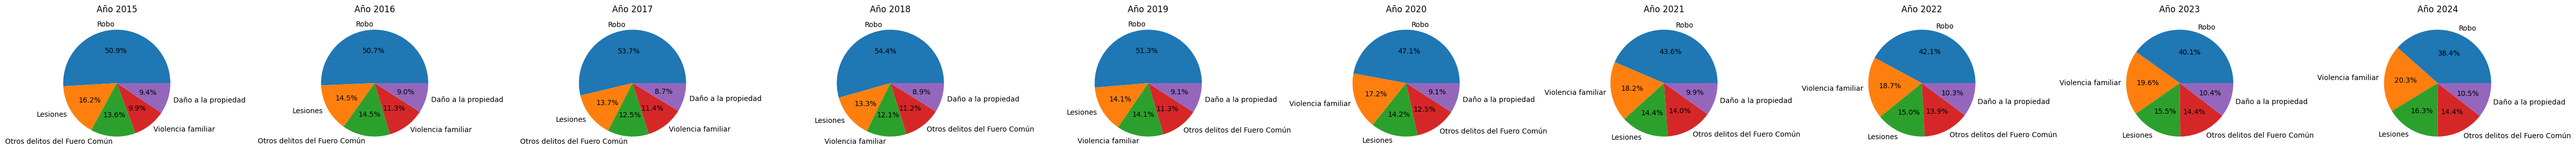

In [78]:
years = sorted(df["anio"].unique())

# Crear subplots (1 fila, N columnas)
fig, axes = plt.subplots(1, len(years), figsize=(5*len(years),5))

# Si solo hay 1 año, convertir axes en lista
if len(years) == 1:
    axes = [axes]

# Loop por año
for i, year in enumerate(years):
    
    data = df[df["anio"] == year]
    
    resumen = data.groupby("tipo_de_delito")["frecuencia"].sum()
    
    # (Opcional) top 5 delitos para que no se vea saturado
    resumen = resumen.sort_values(ascending=False).head(5)
    
    axes[i].pie(resumen, labels=resumen.index, autopct="%1.1f%%")
    axes[i].set_title(f"Año {year}")

plt.tight_layout()
plt.show()

---
#### Calcula la tasa por 100,000 habitantes
##### Tasa por 100,000 habitantes
Mostrar el total de delitos en una entidad no nos sirve de mucho. Es mucho más útil calcular la tasa de incidencia delictiva por cada 100,000 habitantes

$$
tasa = \frac{delitos\space totales}{población} \times 100,000
$$

Esta tasa la podemos anualizar multiplicándola por un factor de 12
$$
tasa\space anualizada = tasa \times 12
$$

Población por entidad federativa según [la encuesta intercensal 2015](https://www.inegi.org.mx/programas/intercensal/2015/)

No tienes que descargar nada. Ya están los datos en la carpeta data

In [77]:
pobs = pd.read_csv('data/poblacion_entidades_2015.csv', encoding='iso-8859-1', sep=";")
pobs = pobs[['Cve_Entidad', 'Entidad', 'Poblacion']]
pobs = pobs.rename(columns={'Cve_Entidad':'clave_entidad', 'Entidad':'entidad', 'Poblacion':'poblacion'})
pobs.head()

,clave_entidad,entidad,poblacion
0,1,Aguascalientes,1312544.0
1,2,Baja California,3315766.0
2,3,Baja California Sur,712029.0
3,4,Campeche,899931.0
4,5,Coahuila de Zaragoza,5217908.0
